In [3]:
import open3d as o3d
import numpy as np
import os
import sys

# monkey patches visualization and provides helpers to load geometries
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

[download_utils.py] E:\05 Coding\PointCloud\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] E:\05 Coding\PointCloud\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] E:\05 Coding\PointCloud\Open3D\examples\test_data\open3d_downloads\tests\bunnyData.pts already exists, skipped.
[download_utils.py] E:\05 Coding\PointCloud\Open3D\examples\test_data\open3d_downloads\tests\point_cloud_sample1.pts already exists, skipped.
[download_utils.py] E:\05 Coding\PointCloud\Open3D\examples\test_data\open3d_downloads\tests\point_cloud_sample2.pts already exists, skipped.
[download_utils.py] E:\05 Coding\PointCloud\Open3D\examples\test_data\open3d_downloads\tests\cube.obj already exists, skipped.
[download_utils.py] E:\05 Coding\PointCloud\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy already exists, skipped.


# File IO
This tutorial shows how basic data structures are read and written by Open3D.

## Point cloud
The code below reads and writes a point cloud.

Testing IO for point cloud ...
PointCloud with 113662 points.
[[1.16796875 1.01803279 0.96484375]
 [1.16845131 1.01953125 0.96484375]
 [1.16796875 1.02158833 0.96484375]
 ...
 [2.19495988 2.62890625 1.45703125]
 [2.19140625 2.63435388 1.45703125]
 [2.19140625 2.62890625 1.45781052]]
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


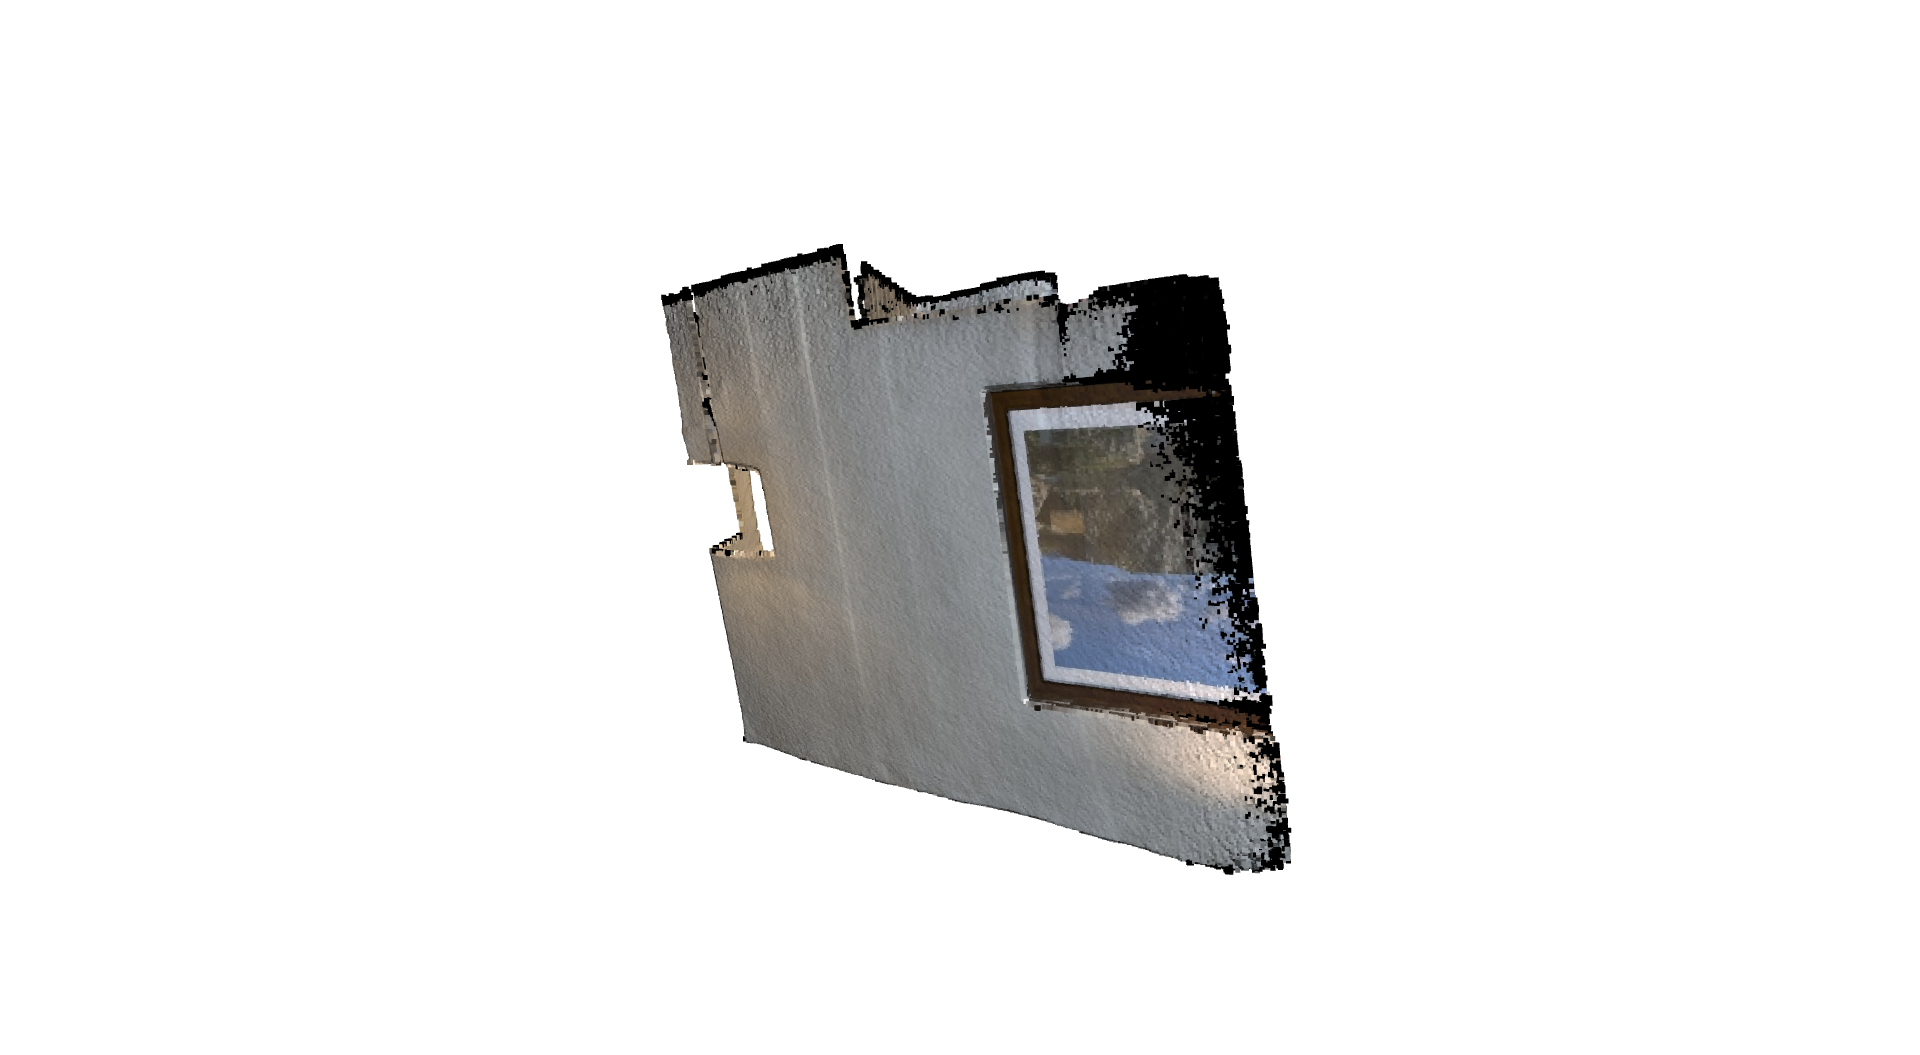

In [6]:
print("Testing IO for point cloud ...")
pcd = o3d.io.read_point_cloud("../../test_data/fragment.pcd")
print(pcd)
print(np.asarray(pcd.points))
o3d.io.write_point_cloud("copy_of_fragment.pcd", pcd)
o3d.visualization.draw_geometries([pcd])

By default, Open3D tries to infer the file type by the filename extension. The following point cloud file types are supported:

Format   | Description
---------|---------------
`xyz`    | Each line contains `[x, y, z]`, where `x`, `y`, `z` are the 3D coordinates
`xyzn`   | Each line contains `[x, y, z, nx, ny, nz]`, where `nx`, `ny`, `nz` are the normals
`xyzrgb` | Each line contains `[x, y, z, r, g, b]`, where `r`, `g`, `b` are in floats of range `[0, 1]`
`pts`    | The first line is an integer representing the number of points. The subsequent lines follow one of these formats: `[x, y, z, i, r, g, b]`, `[x, y, z, r, g, b]`, `[x, y, z, i]` or `[x, y, z]`, where `x`, `y`, `z`, `i` are of type `double` and `r`, `g`, `b` are of type `uint8`
`ply`    | See [Polygon File Format](http://paulbourke.net/dataformats/ply), the ply file can contain both point cloud and mesh data
`pcd`    | See [Point Cloud Data](http://pointclouds.org/documentation/tutorials/pcd_file_format.html)

It’s also possible to specify the file type explicitly. In this case, the file extension will be ignored.

[Open3D WARNING] Read XYZRGB failed: unable to open file: ../../test_data/my_points1.txt
PointCloud with 0 points.


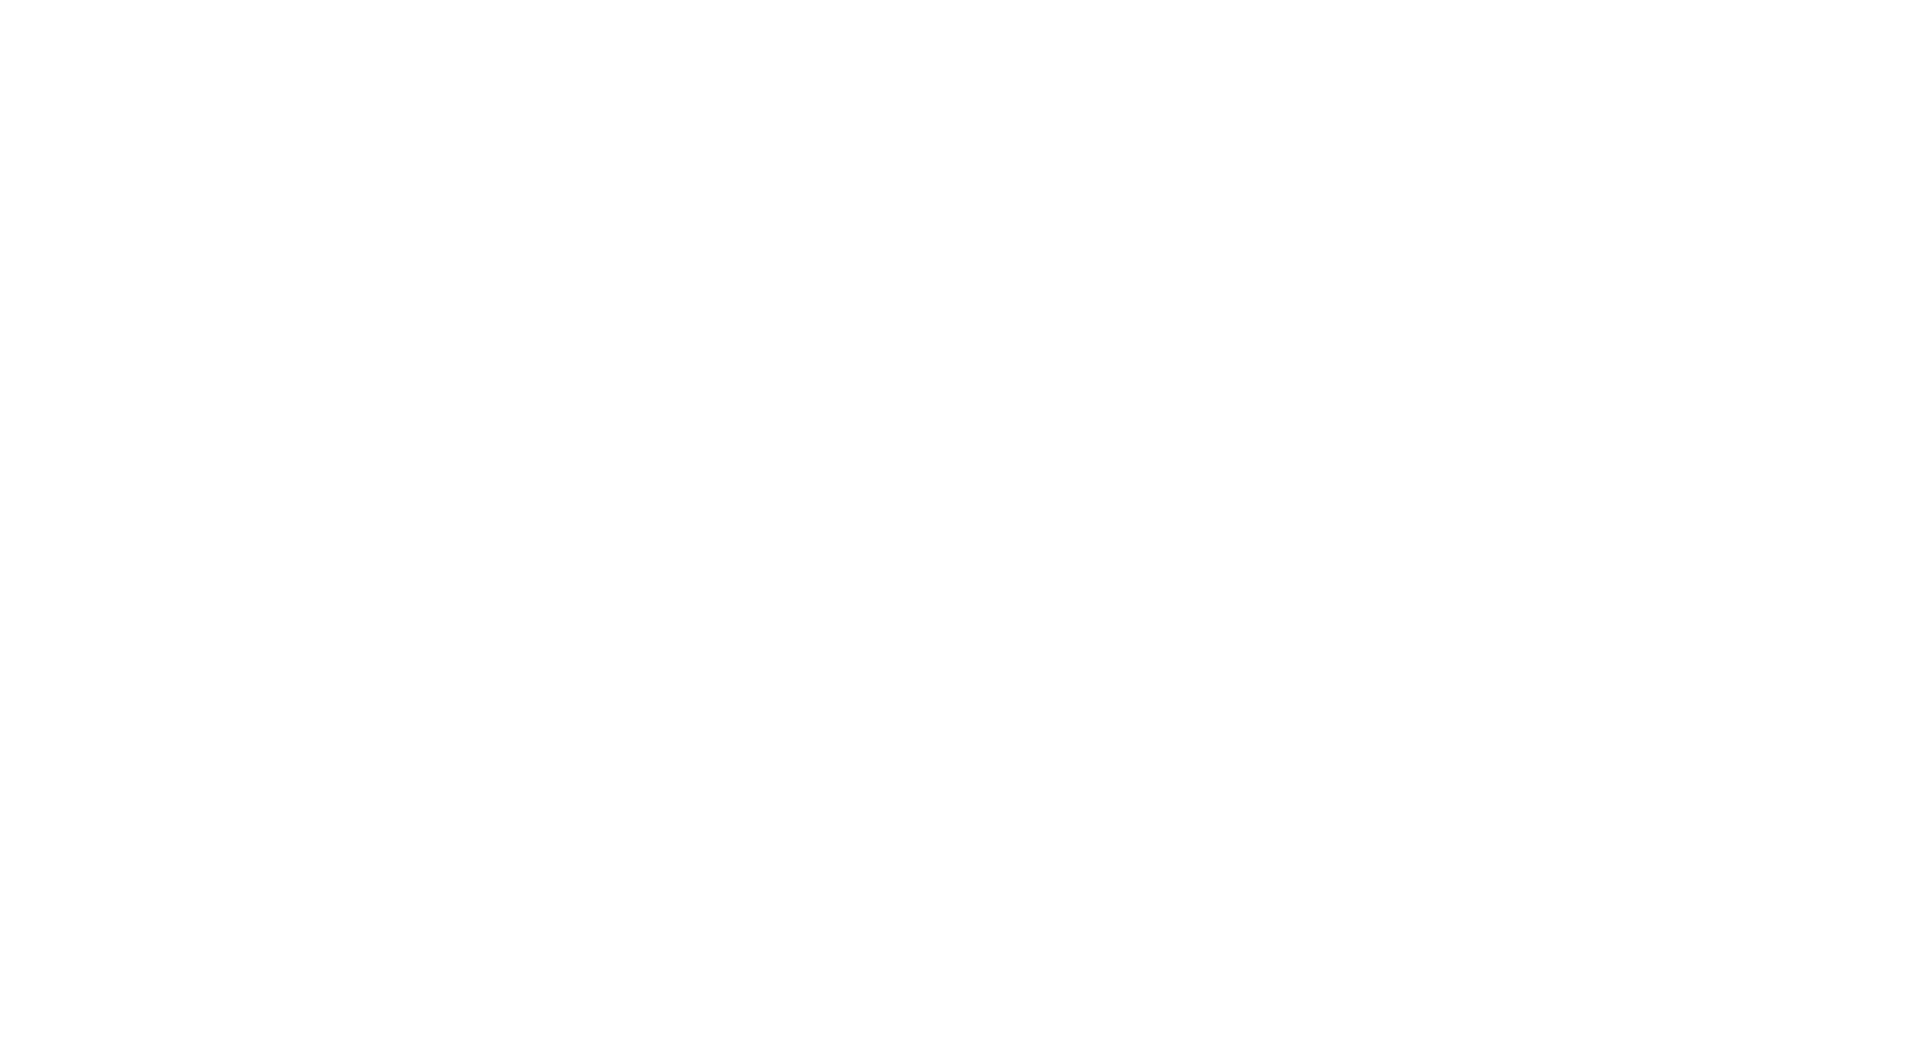

In [16]:
pcd = o3d.io.read_point_cloud("../../test_data/m_points1.txt", format='xyzrgb')
print(pcd)
o3d.visualization.draw_geometries([pcd])

## Mesh
The code below reads and writes a mesh.

In [9]:
print("Testing IO for meshes ...")
mesh = o3d.io.read_triangle_mesh("../../test_data/knot.ply")
print(mesh)
o3d.io.write_triangle_mesh("copy_of_knot.ply", mesh)

Testing IO for meshes ...
TriangleMesh with 1440 points and 2880 triangles.


True

Compared to the point cloud data structure, a mesh has triangles that define the 3D surface.

By default, Open3D tries to infer the file type by the filename extension. The following mesh file types are supported:

Format          | Description
----------------|---------------
`ply`           | See [Polygon File Format](http://paulbourke.net/dataformats/ply/), the ply file can contain both point cloud and mesh data
`stl`           | See [StereoLithography](http://www.fabbers.com/tech/STL_Format)
`obj`           | See [Object Files](http://paulbourke.net/dataformats/obj/)
`off`           | See [Object File Format](http://www.geomview.org/docs/html/OFF.html)
`gltf`/`glb`    | See [GL Transmission Format](https://github.com/KhronosGroup/glTF/tree/master/specification/2.0)

## Image
The code below reads and writes an image.

In [10]:
print("Testing IO for images ...")
img = o3d.io.read_image("../../test_data/lena_color.jpg")
print(img)
o3d.io.write_image("copy_of_lena_color.jpg", img)

Testing IO for images ...
Image of size 512x512, with 3 channels.
Use numpy.asarray to access buffer data.


True

The size of the image is readily displayed using `print(img)`.

Both `jpg` and `png` image files are supported.